# ANALYSIS OF FOUR YEAR DAILY SALES RECORDS

### TABLE_OF_CONTENT

[Problem Statement](#Problem_Statement)

[Column Description](#Column_Description)

[Loading the dataset](#LOADING_THE_DATASET)

[Data Inspection & Cleaning](#DATA_INSPECTION_&_CLEANING)

[Duplicates Check](#CHECKING_FOR_DUPLICATES)

[Creating New Columns](#CREATING_NEW_COLUMNS)

[General Facts](#GENERAL_FACTS_FROM_OUR_DATASET)

[Distribution of Sales and Profit](#CHECKING_DISTRIBUTION_OF_SALES_AND_PROFIT_COLUMNS)

[Analysis of Dataset](#ANALYSIS_OF_DATASET)




### Problem_Statement
A multinational retail company decides to embark on a campaign called 'Operation Increase Sales and Profit' (OISP) which focuses on increasing the sales of the company and maximising profit.

Before the management team of the company can take any actionable decision with regards to the campaign,they want to draw the necessary insight from their 'sitting data'.

As their Data Analyst,you are presented with their four year daily sales records (superstore data.csv).

Task
* Analyse the given data and advise management on what to do to increase sales and profit as intended in the compaign.


* Kindly outlay your analytical steps inline with CRISP-DM(Cross Industry Standard Process for Data Mining)steps, asking the nescessary questions and providing answers based on the data.


* Management expects statistical summaries of the key variables considering the aim of the campaign, visualizations and a report on your findings and your advice.

### Column_Description

Row ID => Unique ID for each row.

Order ID => Unique Order ID for each Customer.

Order Date => Order Date of the product.

Ship Date => Shipping Date of the Product.

Ship Mode=> Shipping Mode specified by the Customer.

Customer ID => Unique ID to identify each Customer.

Customer Name => Name of the Customer.

Segment => The segment where the Customer belongs.

Country => Country of residence of the Customer.

City => City of residence of of the Customer.

State => State of residence of the Customer.

Postal Code => Postal Code of every Customer.

Region => Region where the Customer belong.

Product ID => Unique ID of the Product.

Category => Category of the product ordered.

Sub-Category => Sub-Category of the product ordered.

Product Name => Name of the Product

Sales => Sales of the Product.

Quantity => Quantity of the Product.

Discount => Discount provided.

Profit => Profit/Loss incurred.

In [1]:
##Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


### LOADING_THE_DATASET

In [2]:
data = pd.read_csv('superstore data.csv',parse_dates = ['Order Date','Ship Date'],encoding = 'latin1')
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,nan,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,nan,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,nan,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,nan,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.05,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,nan,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium


In [3]:
data.tail(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,32593,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,94533.00,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.90,2,0.20,4.52,0.89,Medium
51286,47594,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,nan,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1,0.00,0.42,0.49,Medium
51287,8857,MX-2014-110527,2014-12-31,2015-02-01,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,nan,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.40,3,0.00,12.36,0.35,Medium
51288,6852,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,nan,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.12,1,0.00,0.56,0.20,Medium
51289,36388,CA-2014-156720,2014-12-31,2015-04-01,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,United States,80538.00,US,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.02,3,0.20,-0.60,0.17,Medium


# DATA_INSPECTION_&_CLEANING

### CHECKING FOR NULL VALUES  AND DATA TYPES 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [5]:
#Proofng the presence of null values in the Postal code column
(data.isnull().sum()/data.shape[0])*100

Row ID            0.00
Order ID          0.00
Order Date        0.00
Ship Date         0.00
Ship Mode         0.00
Customer ID       0.00
Customer Name     0.00
Segment           0.00
City              0.00
State             0.00
Country           0.00
Postal Code      80.51
Market            0.00
Region            0.00
Product ID        0.00
Category          0.00
Sub-Category      0.00
Product Name      0.00
Sales             0.00
Quantity          0.00
Discount          0.00
Profit            0.00
Shipping Cost     0.00
Order Priority    0.00
dtype: float64

###### Observations

* There are **24 columns and 51290 rows**


* The Postal code column **contains null values (about 80% of its data is missing)**.This column doesnt affect our analysis directly as there are other helpful location columns. This column would be dropped


* All columns have been assigned the right Data type

### CONFIRMING OTHER COLUMNS THAT COULD BE DROPPED

In [6]:
#Confirming if the row_id is unique. 
data["Row ID"].is_unique

True

In [7]:
#Confirming if the Order_id is unique
data["Order ID"].is_unique

False

In [8]:
data["Order ID"].head()

0       AG-2011-2040
1      IN-2011-47883
2       HU-2011-1220
3    IT-2011-3647632
4      IN-2011-47883
Name: Order ID, dtype: object

In [9]:
# prove that Order ID column isnt unique.But has repeatitions of Order IDs within the columns

data[data["Order ID"]== "IN-2011-47883"]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,nan,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,nan,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium
5,22254,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,nan,APAC,Oceania,OFF-PA-10001968,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.24,2,0.10,15.34,1.80,Medium


###### Observations
* The Row Id has been used as a unique identifier to indentify each row.However since this column performs the same function as the index. it can be dropped

* The Order ID column is not unique because once several products are bought for a particular Order id, Our dataset reconginzes the purchase of each product as a row but associates it to the same Order Id.

### DROPPING COLUMNS

In [10]:

print(f"number of columns before dropping {data.shape[1]}")
data.drop(["Row ID","Postal Code"],axis=1,inplace=True)
print(f"number of columns after dropping {data.shape[1]}")


number of columns before dropping 24
number of columns after dropping 22


# CHECKING_FOR_DUPLICATES

### 1) Checking duplicates: for rows with the same data value across all the columns

In [11]:
duplicate_condition=data.duplicated(keep=False)
data[duplicate_condition]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority


###### Observations

* There are no duplicates. No two sales transcations(rows) have the same details across the 22 columns.

### 2) Checking for Duplication: Every Customer id must relate to a single customer name and vice versa.

**From the column descriptions:** Customer ID = Unique Order ID for each Customer.**

This implies two different customers cant have the same customer id.

**Note** Additional Investigation were done to also confirm if **the same customer cant have two different customer ids 

In [13]:
#Total number of Customers
data["Customer ID"].nunique()

1590

In [14]:
data["Customer Name"].nunique()

795

In [15]:
customer_grouping=data.groupby(["Customer ID","Customer Name"]).agg("sum")[["Quantity"]].reset_index()
customer_grouping=customer_grouping.rename({"Quantity":"Number of items Purchased"},axis=1).sort_values("Customer Name")
customer_grouping

,Customer ID,Customer Name,Number of items Purchased
8,AB-10015,Aaron Bergman,268
16,AB-15,Aaron Bergman,33
54,AH-10030,Aaron Hawkins,191
65,AH-30,Aaron Hawkins,40
102,AS-10045,Aaron Smayling,190
...,...,...,...
1583,YC-21895,Yoseph Carroll,197
1586,ZC-11910,Zuschuss Carroll,1
1587,ZC-21910,Zuschuss Carroll,333
1588,ZD-11925,Zuschuss Donatelli,55


Checking this fact **two different customers cant have the same customer id.**

In [16]:
customer_grouping[customer_grouping.duplicated("Customer ID",keep= False)].sort_values("Customer ID")

,Customer ID,Customer Name,Number of items Purchased


Checking this fact **the same customer cant have two different customer ids too**

In [17]:
customer_grouping[customer_grouping.duplicated("Customer Name",keep= False)].sort_values("Customer Name")

,Customer ID,Customer Name,Number of items Purchased
8,AB-10015,Aaron Bergman,268
16,AB-15,Aaron Bergman,33
54,AH-10030,Aaron Hawkins,191
65,AH-30,Aaron Hawkins,40
102,AS-10045,Aaron Smayling,190
...,...,...,...
1583,YC-21895,Yoseph Carroll,197
1586,ZC-11910,Zuschuss Carroll,1
1587,ZC-21910,Zuschuss Carroll,333
1588,ZD-11925,Zuschuss Donatelli,55


In [18]:
# Further investigations to verify the rows with the same Customer Name assigned to different ids
data[data["Customer Name"]=="Aaron Bergman"].head(10)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
938,MX-2011-127215,2011-03-11,2011-05-11,First Class,AB-10015,Aaron Bergman,Consumer,Guadalajara,Jalisco,Mexico,LATAM,North,TEC-PH-10004242,Technology,Phones,"Apple Speaker Phone, VoIP",82.26,1,0.00,18.08,8.35,High
1048,ES-2011-4146320,2011-04-04,2011-09-04,Standard Class,AB-10015,Aaron Bergman,Consumer,Edinburgh,Scotland,United Kingdom,EU,North,OFF-AR-10001714,Office Supplies,Art,"Binney & Smith Markers, Fluorescent",50.70,2,0.00,13.68,10.03,High
1056,ES-2011-4146320,2011-04-04,2011-09-04,Standard Class,AB-10015,Aaron Bergman,Consumer,Edinburgh,Scotland,United Kingdom,EU,North,OFF-LA-10001607,Office Supplies,Labels,"Novimex Shipping Labels, Alphabetical",32.40,3,0.00,16.20,3.09,High
1809,CA-2011-156587,2011-07-03,2011-08-03,First Class,AB-10015,Aaron Bergman,Consumer,Seattle,Washington,United States,US,West,FUR-CH-10004477,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.71,1,0.20,5.48,11.13,High
1815,CA-2011-156587,2011-07-03,2011-08-03,First Class,AB-10015,Aaron Bergman,Consumer,Seattle,Washington,United States,US,West,OFF-AR-10001427,Office Supplies,Art,Newell 330,17.94,3,0.00,4.66,4.29,High
1819,CA-2011-156587,2011-07-03,2011-08-03,First Class,AB-10015,Aaron Bergman,Consumer,Seattle,Washington,United States,US,West,OFF-ST-10002344,Office Supplies,Storage,"Carina 42""Hx23 3/4""W Media Storage Unit",242.94,3,0.00,4.86,1.28,High
5376,ZA-2012-2040,2012-06-04,2012-12-04,Standard Class,AB-15,Aaron Bergman,Consumer,Mufulira,Copperbelt,Zambia,Africa,Africa,TEC-KON-10004774,Technology,Machines,"Konica Inkjet, Durable",1247.40,4,0.00,74.76,81.60,Medium
5378,ZA-2012-2040,2012-06-04,2012-12-04,Standard Class,AB-15,Aaron Bergman,Consumer,Mufulira,Copperbelt,Zambia,Africa,Africa,TEC-NOK-10000784,Technology,Phones,"Nokia Speaker Phone, Cordless",504.00,4,0.00,216.72,43.49,Medium
5399,ZA-2012-2040,2012-06-04,2012-12-04,Standard Class,AB-15,Aaron Bergman,Consumer,Mufulira,Copperbelt,Zambia,Africa,Africa,OFF-ELD-10004625,Office Supplies,Storage,"Eldon Trays, Blue",47.97,1,0.00,8.61,1.99,Medium
5402,ZA-2012-2040,2012-06-04,2012-12-04,Standard Class,AB-15,Aaron Bergman,Consumer,Mufulira,Copperbelt,Zambia,Africa,Africa,OFF-KRA-10001807,Office Supplies,Envelopes,"Kraft Manila Envelope, Security-Tint",28.89,1,0.00,2.31,1.29,Medium


###### Observations

* **Customer ID** is unique for each **Customer Name.**

* **Different Customer Ids** have been assigned to the same Customer Name. This situation occurs for **795 Customers**


* Inferring from the analysis above, two assumptions can be made

  1) **Assumption 1**: this issue is caused by **an error in typing the customer ids.** Because the duplicate customers ids for a particular person is very similar.
  
  eg **ZC 11910** and **ZC 21910** are both assigned to **Zuschuss Carroll**
  
   In line with assumption 1, it would imply there were **795 Customers**. Assuming the Customer Names are all made too have  a unique Customer id.
  
  2) **Assumption 2:** this issue occured because **Customers with the same name bought items from the company**. With the understanding that, the source of this data is from Tablaeu and knowing it works with the concept of ids being unique,(Primary Keys).This theory can be accepted too.
  
     In line with assumption 2, it would imply there were **1590 Customers**. Assuming the Customer Id, as the only source of classifying a Customer.


##### ASSUMPTION 1 SOLUTION

**NOTE: TURN THE CELLS BELOW FROM A MARKDOWN TO A CELL IF YOU WOULD WANT TO WORK WITH ASSUMPTION 1**

#Creating the dataframe to assign a unique customer id to each customer affected by the issue indicated in the observation above.
unique_customer_ids=customer_grouping[customer_grouping.duplicated("Customer Name",keep= "last")].sort_values("Customer Name")
unique_customer_ids["Customer Name"].is_unique

customer_id=unique_customer_ids["Customer ID"]
customer_name=unique_customer_ids["Customer Name"]

#confirming the length of the two columns being used to form the dictionary
print(f"The lenght of both columns are the same: {len(customer_id)==len(customer_name)}")
print('\n')

print("# Confirming pairing")
print(customer_id.iloc[0])
print(customer_name.iloc[0])

customer_dic={}
for i in range(len(customer_id)):
    customer_dic[customer_name.iloc[i]]=customer_id.iloc[i]
    
print('\n')
print(f"This is the length of the unique customer dictionary: {len(customer_dic)}")

#testing dictionary replacement
for name in customer_grouping["Customer Name"]:
    if name in customer_dic:
        customer_grouping.loc[customer_grouping["Customer Name"]==name,"Customer ID"]=customer_dic[name]

customer_grouping.sort_values("Customer Name")

#effecting the replacement on the main dataset(this takes a while to run, 5mins)
for name in data["Customer Name"]:
    if name in customer_dic:
        data.loc[data["Customer Name"]==name,"Customer ID"]=customer_dic[name]
        


#After replacement in the main data set confirmation
j=data.groupby(["Customer ID","Customer Name"]).agg("count")["Product ID"].reset_index().rename({"Product ID":"Number of Products Purchased"},axis=1)
j[j.duplicated(["Customer Name"])]
j.shape

###### Confirming if customer id replacement was done right.

previously the number of itemss purchased was seperated for customers with the same name but different customer ids 

for example
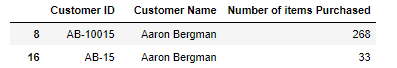

j[j["Customer Name"]=="Aaron Bergman"]

j["Customer ID"].is_unique
j["Customer Name"].is_unique

data["Customer ID"].nunique()

##### ASSUMPTION 2 SOLUTION

This implies that if we want to work with assumption 2, the **CUSTOMER ID & CUSTOMER NAME PAIRING only** should be used to identify each customer. Using Customer Name for analysis would produce an error

**ASSUMPTION 2** WOULD BE USED FOR THE REST OF THIS ANALYSIS

### 3) Checking for duplicate: Different Customers assigned to the same order ids

**From the column descriptions:** Order ID = Unique Order ID for each Customer.**

A customer can have different order ids beacause he or she placed orders on different days

This implies

1) Every order id must relate to a single customer.

2) two different customers cant have the same order id.

In [19]:
order_id_grouping=data.groupby(["Order ID","Customer ID","Order Date"]).agg("sum")["Quantity"].reset_index()
order_id_grouping

,Order ID,Customer ID,Order Date,Quantity
0,AE-2011-9160,PO-8865,2011-03-10,8
1,AE-2013-1130,EB-4110,2013-10-14,7
2,AE-2013-1530,MY-7380,2013-12-31,3
3,AE-2014-2840,PG-8820,2014-05-11,1
4,AE-2014-3830,GH-4665,2014-12-13,16
...,...,...,...,...
25749,ZI-2014-7160,EH-4125,2014-10-30,4
25750,ZI-2014-7610,BS-1380,2014-03-24,2
25751,ZI-2014-9540,BT-1395,2014-09-06,2
25752,ZI-2014-9550,JC-5775,2014-12-18,3


In [20]:
order_id_grouping["Order ID"].is_unique

False

In [21]:
order_id_grouping[order_id_grouping.duplicated("Order ID",keep= False)].sort_values("Order ID")

,Order ID,Customer ID,Order Date,Quantity
31,AG-2012-2220,MV-8190,2012-09-11,1
32,AG-2012-2220,PO-8865,2012-12-26,7
2124,CA-2012-9840,LB-6735,2012-06-25,2
2125,CA-2012-9840,RR-9525,2012-01-11,1
3236,CA-2013-3830,SC-10770,2013-03-30,1
...,...,...,...,...
25590,US-2014-166394,VM-21835,2014-05-09,6
25640,UZ-2014-6400,IG-5085,2014-11-27,1
25641,UZ-2014-6400,MS-7770,2014-08-14,10
25739,ZI-2014-1780,AP-720,2014-09-17,1


In [22]:
# confirming the fact that the same Order ID has been assigned to different Customers
data[data["Order ID"]=="AG-2012-2220"]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
6679,AG-2012-2220,2012-09-11,2012-11-13,Standard Class,MV-8190,Mike Vittorini,Consumer,Algiers,Alger,Algeria,Africa,Africa,FUR-HAR-10003548,Furniture,Chairs,"Harbour Creations Bag Chairs, Set of Two",63.87,1,0.00,20.43,4.60,Medium
43686,AG-2012-2220,2012-12-26,2012-12-30,Standard Class,PO-8865,Patrick O'Donnell,Consumer,Guelma,Guelma,Algeria,Africa,Africa,TEC-HEW-10002304,Technology,Copiers,"Hewlett Fax Machine, High-Speed",1908.72,6,0.00,190.80,169.70,High
43717,AG-2012-2220,2012-12-26,2012-12-30,Standard Class,PO-8865,Patrick O'Donnell,Consumer,Guelma,Guelma,Algeria,Africa,Africa,OFF-SAN-10002639,Office Supplies,Art,"Sanford Markers, Easy-Erase",23.52,1,0.00,0.45,2.69,High


###### Observations
* **The same Order IDs** have been assigned to **different Customers.** Despite purchasing items on different days.This is an indication of a error in the allocation of Order IDs. **719 Order ID have this issue.**


* Since this Customers made purcahses dropping them in our analysis wouldnt be advisable.As it would greatly affect our Sales Calculations.





* Solution: **To peform all analysis by always pairing Order ID with Customer ID**


* As such these rows would all be kept.However the Client would be advised to work on their Order Id allocation

##### OTHER FACTS REVEALED FROM REVIEWING THE ORDER ID COLUMN

The same customer can have different order ids. An order id just represents an order set. **for example** if an order is placed today by the customer, he or she gets an order id for today. For the next day, the order id is different but for the same customer.

**See  below**

In [ ]:
order_id_grouping[order_id_grouping.duplicated("Customer ID",keep= False)].sort_values("Customer ID").head(20)

### 4) Checking Duplication : Product ID must be unique for each product

Criteria:**the same Product Name, same Category, same sub_Category = the same Product**

a) The same Products assigned to the different Product id

b) The same Product ID assigned to more than one Product


In [ ]:
#unique same product for the entire dataset

unique_product_entire=data.groupby(["Product Name","Category","Sub-Category"]).agg("count")["Sales"].sort_values(ascending=False)
unique_product_entire.head(5)

Checking this fact: **The same Products assigned to different Product id**

In [ ]:
#prove that same products have been assigned different Product IDs
product_grouping=data.groupby(["Product ID","Product Name","Category","Sub-Category"]).agg("sum")["Quantity"].reset_index()
product_grouping.head(5).sort_values("Quantity",ascending=False)


In [ ]:
##highlighting specific same Products with more than one Product ids
products=product_grouping.groupby(["Product Name","Category","Sub-Category"]).agg("count")[["Product ID"]].sort_values('Product ID',ascending=False)
products.rename({"Product ID":"Number of Product IDs"},axis=1,inplace=True)
products

In [ ]:
#Product id to number of products with that amount of product ids
products["Number of Product IDs"].value_counts()

In [ ]:
#detailed breakdown of same products assigned with different ids
repeated_products=product_grouping[product_grouping.duplicated(["Product Name","Category","Sub-Category"],keep=False)]
repeated_products.sort_values("Product Name")


Checking this fact:**The same Product ID assigned to more than one Product**

In [ ]:
product_grouping[product_grouping.duplicated("Product ID",keep=False)].sort_values("Product ID").drop("Quantity",axis=1)

###### Observation

* Generally the Product ID column is **problematic**. Two products have the same Proucts Ids and the same product has multiple ids


* A product would therefore be defined as : **Product =Product Name + Category+ Sub_Category**


* Based on the product definition, There are **3797 unique products** in our entire dataset


* Out of **3797 unique  products**, **1951 products** dont have unique Product IDs.Thats represent about **51% of our dataset**


* To avoid being tempted to use the Product ID in our analysis,it would be dropped.


In [ ]:
print(f"number of columns before dropping {data.shape[1]}")
data.drop(["Product ID"],axis=1,inplace=True)
print(f"number of columns after dropping {data.shape[1]}")

# CREATING_NEW_COLUMNS

###  1) SALES COLUMNS

**The Sales column provided represents the Total Sales with the effect of the discount.**

However ,using the discount column, I sought to find **Total Sales without Discount** ,**the Unit Price with Discount** and **the Unit Price without Discount**

In [ ]:
data["Discount Percent"]=round(data["Discount"]*100,2)
data["unit_price_with_discount"]=data["Sales"]/data["Quantity"]
data["actual_unit_price"]=round((100/(100-data["Discount Percent"]))*data["unit_price_with_discount"],2)
data["Total_Sales_with_Discount"]=data["Sales"]
data["Total_Sales_without_Discount"]=data["Quantity"]*data["actual_unit_price"]
data["discounted_amount"]=data["Total_Sales_without_Discount"]-data["Total_Sales_with_Discount"]

In [ ]:
#crosschecking to ensure these two columns are the same before dropping the Sales column
(data["Sales"]==data["Total_Sales_with_Discount"]).sum()

In [ ]:
print(f"there were {data.shape[1]} columns")
data.drop(["Sales","Discount"],inplace=True,axis=1)
print(f"there are now {data.shape[1]} columns")

### DATE COLUMNS

Extracting Months,Day,Year from Order Date & Calculating the lenght of days between Ship Date and Order Date

In [ ]:
print(f"there were {data.shape[1]} columns")

data["Order Year"]=data["Order Date"].dt.year
data["Order Month"]=data["Order Date"].dt.strftime("%B")
data["Order Day"]=data["Order Date"].dt.strftime("%A")
data["Lenght of Days From Order to Shipping)"]= (data["Ship Date"]-data["Order Date"]).dt.days


print(f"there are now {data.shape[1]} columns")


In [ ]:
data.head(5)

# GENERAL_FACTS _FROM_OUR_DATASET

In [ ]:
#crosschecking the unique members of the categorical columns

categorical_columns=["Order Year","Ship Mode","Segment","Country","Market","Region","Category","Sub-Category","Order Priority"]

for col in categorical_columns:
    print(f'There are \033[1m {data[col].nunique()}  unique names \033[0m in the {col} column')
    print(data[col].value_counts())
    print("\n")

In [ ]:
#categorical columns only
data.describe(include=['O'])

In [ ]:
#numerical columns only
data.describe()

# CHECKING_DISTRIBUTION_OF_SALES_AND_PROFIT_COLUMNS

### SALES COLUMNS

**Note:** The actual sales generated is in the Total Sales with Discount Column

In [ ]:
sns.boxplot(x=data["Total_Sales_with_Discount"])
plt.show()

In [ ]:
#outlier Sales (Sales generating ghc10,000 and above)
revenue_greaterthan_gh10000=data[data["Total_Sales_with_Discount"]>=10000].sort_values("Total_Sales_with_Discount",ascending=True)
revenue_greaterthan_gh10000.shape

In [ ]:
#Sales generating  less than GHC1
revenue_less_than_ghc1=data[data["Total_Sales_with_Discount"]<=1].sort_values("Total_Sales_with_Discount",ascending=True)
revenue_less_than_ghc1.shape

In [ ]:
plt.figure(figsize=(10,10))
data.Total_Sales_with_Discount.hist()
plt.title("DISTRIBUTION OF SALES")
plt.xlabel("Sales(Ghc)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
(data["Total_Sales_with_Discount"]<2500).sum()

In [ ]:
((data["Total_Sales_with_Discount"]>2500)&(data["Total_Sales_with_Discount"]<5000)).sum()

In [ ]:
(data["Total_Sales_with_Discount"]>5000).sum()

In [ ]:
(data["Total_Sales_with_Discount"]>10000).sum()

###### Observations of Sales column

There are **51290 sales transactions**

1) Most of the sales transactions **(50859)** representing **about 99%** of sales transactions generates income below **GHC 2500 and below**. 

2) Only **5 sales transactions** generated income **above GHC10000**

3) Only **44 sales transactions** generated income **above GHC5000**

3) There are **8 sales transactions** generated income less than **GHC 1**




### PROFIT COLUMNS

In [ ]:
sns.boxplot(x=data["Profit"])
plt.show()

In [ ]:
#Sales transactions generating losses
loss_transactions=data[data["Profit"]<0].sort_values("Total_Sales_with_Discount",ascending=True)
loss_transactions.rename({"Profit":"Loss"},axis=1,inplace=True)
loss_transactions.shape

In [ ]:
#Sales generating profit
profit_transactions=data[data["Profit"]>0].sort_values("Total_Sales_with_Discount",ascending=True)
profit_transactions.shape


In [ ]:
#Sales generating niether a profit or loses
break_even_transactions=data[data["Profit"]==0].sort_values("Total_Sales_with_Discount",ascending=True)
break_even_transactions.shape

#### Observations of Profit Columns
There are **51290 sales transactions**

1)  **38078** sales transactions representing **about 74%** generates profit. 

2) **668** of the sales transactions representing **about 1%** generates neither a profit or Loss

3) **12544** of the sales transactions representing about **25%** generates losses

### GENERAL CORRELATION BETWEEN SALES AND PROFIT

In [ ]:
#for profit making transactions only
sns.relplot(x='Total_Sales_with_Discount',y = 'Profit',data = profit_transactions,col="Category")
plt.show()

In [ ]:
#Correlation coefficient for profit transactions
profit_transactions["Total_Sales_with_Discount"].corr(profit_transactions["Profit"])

In [ ]:
#sales transaction generating the highest profit overall & also the highest for Technology
technology=data.loc[data["Category"]=="Technology"]

highest_profit=technology["Profit"].max()
print(f" The highest profit generated is {highest_profit} ") # highest overall profit

technology[technology["Profit"]==technology["Profit"].max()]

In [ ]:
# sales transaction generating the most profit in the furniture Category
furniture=data.loc[data["Category"]=="Furniture"]
furniture[furniture["Profit"]==furniture["Profit"].max()]

In [ ]:
# sales transaction generating the most profit in the Office Supplies Category
office_supplies=data.loc[data["Category"]=="Office Supplies"]
office_supplies[office_supplies["Profit"]==office_supplies["Profit"].max()]

###### Observations

* There generally a **very strong positive correlation** between Sales and Profit. Generally, the higher the sales the more likely it yields a higher profit


* the highest profit generated was above **GHC 8000** (8399.976 to be exact) and for this sales transaction the product bought was **Canon imageCLASS 2200 Advanced Copierproduct**.it belongs to the **Technology Category**.

In [ ]:
#for loss making transactions only
sns.relplot(x='Total_Sales_with_Discount',y = 'Loss',data = loss_transactions,col="Category" )
plt.show()

In [ ]:
#Correlation coefficient for Loses
loss_transactions["Total_Sales_with_Discount"].corr(loss_transactions["Loss"])

In [ ]:
#for negative numbers -1>-2 ,hence th highest loss would be the minimum value 
loss_transactions[loss_transactions["Loss"]==loss_transactions["Loss"].min()]

##### Observation

* There's a **moderate negative correlation** between Sales and Loss. That's the highest sales didnt generate the highest loss amount


* the highest loss amount generated was above **GHC 6000** (6599.98 to be exact) and for this sales transaction the product bought was **Cubify CubeX 3D Printer Double Head Print**.it belongs to the **Technology Category**.

# ANALYSIS_OF_DATASET

This analysis is to focus solely on sales and maximizing profit.As such analysis questions would be based on the following

1) Unit Price per Product Analysis 

1) Number of Sales Transactions for each year

How Sales and Profit/Loss has fared over the various years in the dataset.

2) Which month does the company records more sales for each year.

3) Investigate the extent of how Discount has affected Sales over the years

4) Which Products are generating the most sales (Considering the varied range of selling price from lowest-highest)

5) The most and Least selling Products in terms of Quantity

6) The most and Least selling Products for each Category

7) the product generating the most profit

## PRICING

### Unit Price Distribution per Product Analysis (Without Discount)

In [ ]:
#Finding unit price for each unique product
# using the actual unit prices before discount
unit_pice_per_product=data.groupby(["Product Name","Category","Sub-Category"]).agg("count")[["actual_unit_price"]].sort_values("actual_unit_price",ascending=False)
unit_pice_per_product.head(10)

###### Observation

* the unit price for each a unique product wasnt fixed for a year.it varied

In [ ]:
#investigating and confirming the change of  actual unit price of a product across a year(2012)
r=data.loc[(data["Product Name"]=="Cardinal Index Tab, Clear") & (data["Order Year"]==2012),["actual_unit_price",'Order Year',"Order Month"]]

month_code={"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,"August":8,"September":9,"October":10,"November":11,"December":12}

r["Months_Code"]=r["Order Month"].replace(month_code)
r.sort_values("Months_Code",inplace=True)


r.plot("Order Month","actual_unit_price")
plt.xticks(rotation=60)
plt.show()

In [ ]:
# acquiring and redifining my grouping for the actual unit_prices for each of the unique prodcuts
#Based on the findings above that unit price varies for a product
unit_price_per_unique_products=data.groupby(["Product Name","Category","Sub-Category","actual_unit_price"]).agg("sum")[["Quantity"]].reset_index().sort_values(["Product Name","Category","Sub-Category"])
unit_price_per_unique_products.shape

#There are **5874 varied unit prices** from 2011-2014

In [ ]:
sns.catplot("actual_unit_price",data=unit_price_per_unique_products,kind="box",col="Category")
plt.show()

In [ ]:
sns.distplot(unit_price_per_unique_products["actual_unit_price"])
plt.show()

In [ ]:
# Note: even though there were 3797 unique products most of these product have varied unit prices. Since unit price for a product varied within and across the various years
# Note :There are 5874 varied unit prices from 2011-2014

# Number of unit prices below Ghc 100
unit_price_per_unique_products[unit_price_per_unique_products["actual_unit_price"]<100].shape

In [ ]:
max_unit_price=unit_price_per_unique_products["actual_unit_price"].max()
max_unit_price

In [ ]:
unit_price_per_unique_products[unit_price_per_unique_products["actual_unit_price"]==max_unit_price]

In [ ]:
min_unit_price=unit_price_per_unique_products["actual_unit_price"].min()
min_unit_price

In [ ]:
unit_price_per_unique_products[unit_price_per_unique_products["actual_unit_price"]==min_unit_price]

##### Observations from Unit Price Distribution per Product Analysis (Without Discount)

* There are **3797 Unique products** sold from **2011-2014**


* There are **5874 unique unit prices** from **2011-2014** and **4272 of these products (approximately 73%)** were already priced **less than Ghc 100** before the discount


* Before the discount, for the **3797 unique products sold** the unit prices of items sold ranged from approximately **Ghc0.99 to GHc 7546**


* The **highest priced product** was from the **Technology Category,Machine Sub-Category** and the **lowest priced product** from the **Technology Category, Accessories Sub-Category**.


* Most of these products were already priced low before the discount was effected


### Unit Price Distribution per Product Analysis (With Discount)

In [ ]:
#discounted unit prices per each product, as usually it varies for a product within and across the years 2011-2014
discounted_unit_price_per_unique_products=data.groupby(["Product Name","Category","Sub-Category","unit_price_with_discount","Discount Percent"]).agg("sum")[["Quantity"]].reset_index().sort_values(["Product Name","Category","Sub-Category"])
discounted_unit_price_per_unique_products.shape

In [ ]:
sns.catplot("unit_price_with_discount",data=discounted_unit_price_per_unique_products,kind="box",col="Category")
plt.show()

In [ ]:
sns.distplot(discounted_unit_price_per_unique_products["unit_price_with_discount"])
plt.show()

In [ ]:
#unit prices  not discounted
discounted_unit_price_per_unique_products[(discounted_unit_price_per_unique_products["Discount Percent"]==0)].shape

In [ ]:
#unit prices discounted
discounted_unit_price_per_unique_products[(discounted_unit_price_per_unique_products["Discount Percent"]>0)].shape

In [ ]:
# Number of unit prices below Ghc 100 after discount was applied to sales(for entire dataset)
discounted_unit_price_per_unique_products[(discounted_unit_price_per_unique_products["unit_price_with_discount"]<100)].shape

In [ ]:
max_discounted_unit_price=discounted_unit_price_per_unique_products["unit_price_with_discount"].max()
max_discounted_unit_price

In [ ]:
discounted_unit_price_per_unique_products[discounted_unit_price_per_unique_products["unit_price_with_discount"]==max_discounted_unit_price]

In [ ]:
min_discounted_unit_price=discounted_unit_price_per_unique_products["unit_price_with_discount"].min()
min_discounted_unit_price

In [ ]:
discounted_unit_price_per_unique_products[discounted_unit_price_per_unique_products["unit_price_with_discount"]==min_discounted_unit_price]

##### Observations from Unit Price Distribution per Product Analysis (With Discount)

### DISCOUNT RANGES

In [ ]:
# discount range analysis
plt.figure(figsize=(10,7))
data["Discount Percent"].value_counts().sort_index().plot(kind="bar")
plt.show()


## SALES

### Total Sales Across the Entire 4 years (2011-2014)

In [ ]:
total_sales=round(data["Total_Sales_with_Discount"].sum(),2)
print(f" The total sales or revenue genrated from 2011 to 2014 was {total_sales:,}")

In [ ]:
#Finding Percentage increase in sales across the various years
sales=round(data.groupby("Order Year").sum()[["Total_Sales_with_Discount"]])
sales["Percentage_Change"]=round(sales["Total_Sales_with_Discount"].pct_change()*100)
sales.style.format("{:,}")

In [ ]:
data.groupby("Order Year").sum()[["Total_Sales_with_Discount"]].plot(kind="bar",title="TOTAL SALES PER YEAR",figsize=(6,5))
plt.ticklabel_format(axis="y", style='plain')
plt.xticks(rotation=0)
plt.show()

###### Observations

* Genrally Sales increased across the various years(2011-2014)

### Comparative Analysis of Total Sales across the 4 years(2011-2014)

In [ ]:
# Breaking dataset by years
eleven= data[data["Order Year"]==2011]
twelve= data[data["Order Year"]==2012]
thirteen= data[data["Order Year"]==2013]
fourteen= data[data["Order Year"]==2014]

#Grouping by Order month and reseting index
tw_eleven=eleven.groupby("Order Month").sum()[["Total_Sales_with_Discount"]].reset_index()
tw_twelve=twelve.groupby("Order Month").sum()[["Total_Sales_with_Discount"]].reset_index()
tw_thirteen=thirteen.groupby("Order Month").sum()[["Total_Sales_with_Discount"]].reset_index()
tw_fourteen=fourteen.groupby("Order Month").sum()[["Total_Sales_with_Discount"]].reset_index()

#Month code dictionary has been already created above
#month_code={"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,"August":8,"September":9,"October":10,"November":11,"December":12}
#Creating Month code column to aid in sorting by months (Jan,Feb,etc)
tw_eleven["month_code"]=tw_eleven["Order Month"].replace(month_code)
tw_twelve["month_code"]=tw_twelve["Order Month"].replace(month_code)
tw_thirteen["month_code"]=tw_thirteen["Order Month"].replace(month_code)
tw_fourteen["month_code"]=tw_fourteen["Order Month"].replace(month_code)

#Sorting based on month code column
tw_eleven.sort_values("month_code",inplace=True)
tw_twelve.sort_values("month_code",inplace=True)
tw_thirteen.sort_values("month_code",inplace=True)
tw_fourteen.sort_values("month_code",inplace=True)

# plotting line graph

fig,ax = plt.subplots(figsize = (12,10))
plt.plot("Order Month","Total_Sales_with_Discount",label = '2011',data=tw_eleven)
plt.plot("Order Month","Total_Sales_with_Discount",label='2012',data=tw_twelve)
plt.plot("Order Month","Total_Sales_with_Discount",label='2013',data=tw_thirteen)
plt.plot("Order Month","Total_Sales_with_Discount",label='2014',data=tw_fourteen)
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.title('COMPARATIVE ANALYSIS OF SALES BY YEARS(2011-2014)')
plt.legend()
plt.show()

###### Observations

* Generally sales **increases** across the various years. However within a specific year,the total sales/revenue generated flatuates a lot

### Sales Distribution Across the 3 Product Catergories (2011-2014)

In [ ]:
chart=sns.catplot("Category","Total_Sales_with_Discount",data=data,kind="bar",col="Order Year",col_wrap=2,ci=None,estimator=sum,sharex=False)
chart.set_xticklabels(rotation=0)
plt.ticklabel_format(axis="y", style='plain')
chart.fig.subplots_adjust(top=0.9)
chart.fig.suptitle("TOTAL SALES DISTRIBUTION BY CATEGORY")
plt.show()

###### Observations
* Generally Technology generates the most sales throughout all the 4 years (2011-2014)

In [ ]:
chart4=sns.catplot('Sub-Category',"Total_Sales_with_Discount",data=data,kind="bar",col="Category",sharex=False,margin_titles=True,estimator=sum,ci=None)
chart4.set_xticklabels(rotation=90)
plt.ticklabel_format(axis="y", style='plain')
plt.show()

###### OBSERVATIONS

* The **Appliances Sub-Category** generates the **most total sales** for Office Supplies


* The **Chairs Sub-Category** generates the **most total sales** for Furniture


* The **Copiers** Sub-Category** generates the **most sales sales** for Technology

**Note: this observation is highly affected by the unit price of the products within the Sub- Catergory**

### Sales distribution across the 7 markets(2011-2014)

In [ ]:
chart2=sns.catplot("Market","Total_Sales_with_Discount",data=data,kind="bar",col="Order Year",col_wrap=2,ci=None,estimator=sum,sharex=False,hue="Segment")
chart2.set_xticklabels(rotation=0)
plt.ticklabel_format(axis="y", style='plain')
chart2.fig.subplots_adjust(top=0.9)
chart2.fig.suptitle("TOTAL SALES DISTRIBUTION BY MARKET & SEGMENT")
plt.show()

###### Observations

* Generally **APAC** generates the **most sales** with **Canada** having the **least Sales**. **Consumer** related sales tends to genrate the most sales in each Market

### Profit, Loss and Breakeven Against Sales

In [ ]:
#profit only
profits=round(profit_transactions.groupby("Order Year").sum()[["Total_Sales_with_Discount","Profit"]]).sort_values("Total_Sales_with_Discount",ascending=False)
profits.style.format("{:,}")

In [ ]:
data.groupby("Order Year").agg(sum)[["Total_Sales_with_Discount","Profit"]].plot(kind="bar")

In [ ]:
profits.plot(kind="bar",title="PROFIT TRANSACTIONS: Total Sales and Profit (2011-2014)",figsize=(7,7))
plt.xticks(rotation=0)
plt.ticklabel_format(axis="y", style='plain')
plt.show()

In [ ]:
#loss only
loss=round(loss_transactions.groupby("Order Year").sum()[["Total_Sales_with_Discount","Loss"]]).sort_values("Total_Sales_with_Discount",ascending=False)
loss.style.format("{:,}")

In [ ]:
loss.plot(kind="bar",title="LOSS TRANSACTIONS:Total Sales and Profit (2011-2014)",figsize=(7,7))
plt.xticks(rotation=0)
plt.ticklabel_format(axis="y", style='plain')
plt.show()

In [ ]:
#breakeven  only
breakevens=round(break_even_transactions.groupby("Order Year").sum()[["Total_Sales_with_Discount","Profit"]]).sort_values("Total_Sales_with_Discount",ascending=False)
breakevens.style.format("{:,}")

In [ ]:
breakevens.plot(kind="bar",title="BREAKEVEN TRANSACTIONS:Total Sales and Profit (2011-2014)",figsize=(7,7))
plt.xticks(rotation=0)
plt.ticklabel_format(axis="y", style='plain')
plt.show()

### Profit and Loss for each Market

In [ ]:
#profit per market
round(profit_transactions.groupby("Market").agg(sum)[["Total_Sales_with_Discount","Profit"]],2).sort_values("Profit",ascending=False).style.format("{:,}")

In [ ]:
chart5=sns.catplot("Market","Profit",data=profit_transactions,kind="bar",col="Order Year",col_wrap=2,ci=None,estimator=sum,sharex=False)
chart5.set_xticklabels(rotation=0)
plt.ticklabel_format(axis="y", style='plain')
chart5.fig.subplots_adjust(top=0.9)
chart5.fig.suptitle("PROFIT DISTRIBUTION BY MARKET")
plt.show()

In [ ]:
#Loss per market
round(loss_transactions.groupby("Market").agg(sum)[["Total_Sales_with_Discount","Loss"]],2).sort_values("Loss",ascending=True).style.format("{:,}")

In [ ]:
chart6=sns.catplot("Market","Loss",data=loss_transactions,kind="bar",col="Order Year",col_wrap=2,ci=None,estimator=sum,sharex=False)
chart6.set_xticklabels(rotation=0)
plt.ticklabel_format(axis="y", style='plain')
chart6.fig.subplots_adjust(top=0.9)
chart6.fig.suptitle("LOSS DISTRIBUTION BY MARKET ")
plt.show()

In [ ]:
sns.relplot("Order Month","Profit",data=data,hue="Category",kind="line")

### UNDERSTANDING GENERAL DISTRIBUTION OF SALES TRANSACTIONS

In [ ]:
#Distribution of sales  transactions across market
plt.figure(figsize=(6,5))
sns.countplot(x='Market',data=data)
plt.show()

###### Observation

* APAC market generates the most sales attraction.Canada generates the least and is very small. Futher Invetigation will be conducted to investigate Canada extremely low level of sales attraction

In [ ]:
# Distribution of sales transactions across Segment
plt.figure(figsize=(6,5))
sns.countplot(x='Segment',data=data)
plt.show()

###### OBSERVATIONS

* The **Consumer Segment** generates the **most sales attraction**

In [ ]:
# Distribution of Sales transcations Across Market and Category
chart3=sns.catplot('Category',data=data,kind="count",col="Market",sharex=False,col_wrap=3,margin_titles=True)
chart3.set_xticklabels(rotation=0)
plt.show()

In [ ]:
# Distribution of Sales transcations Across Category and Sub- Catergory
chart3=sns.catplot('Sub-Category',data=data,kind="count",col="Category",sharex=False,margin_titles=True)
chart3.set_xticklabels(rotation=90)
plt.show()

###### Observations

* The **Binders Sub-Category** generates the **most sales attraction** for Office Supplies


* The **Chairss Sub-Category** generates the **most sales attraction** for Furniture


* The **Phones Sub-Category** generates the **most sales attraction** for Technology


### OVERALL TOP 10 MOST ORDERED PRODUCTS (2011-2014)

In [ ]:
ordered_products=data.groupby(["Product Name","Category","Sub-Category"]).agg("sum")[["Quantity","Total_Sales_with_Discount"]].sort_values("Quantity",ascending=False)
ordered_products.head(10)


### OVERALL TOP 10 LEAST ORDERED PRODUCTS (2011-2014)


In [ ]:
ordered_products.tail(10)

### MOST ORDERED & LEAST ORDERED PRODUCT BY CATEGORY (2011-2014)

###### Furniture

In [ ]:
ordered=ordered_products.reset_index()
funiture_orders=ordered.loc[ordered["Category"]=="Furniture"].sort_values("Quantity",ascending=False)
funiture_orders.head(10)

In [ ]:
funiture_orders.tail(10)

###### Office Supplies

In [ ]:
office_orders=ordered.loc[ordered["Category"]=="Office Supplies"].sort_values("Quantity",ascending=False)
office_orders.head(10)

In [ ]:
office_orders.tail(10)

###### Technology

In [ ]:
technology_orders=ordered.loc[ordered["Category"]=="Technology"].sort_values("Quantity",ascending=False)
technology_orders.head(10)

In [ ]:
technology_orders.tail(10)

## SHIPPING COST EFFECT ON SALES AND PROFIT

In [ ]:
#Effect on Sales
sns.relplot(x='Total_Sales_with_Discount',y = 'Shipping Cost',data = data,col="Category" )
plt.show()

In [ ]:
#Correlation coefficient
data["Total_Sales_with_Discount"].corr(data["Shipping Cost"])

###### Observations

* There generally a **strong positive correlation** between Total Sales and Shipping Cost. An indication that Shipping Cost may be having an effect on Sales

In [ ]:
#Effect on Profit
sns.relplot(x='Profit',y = 'Shipping Cost',data = data,col="Category" )
plt.show()

In [ ]:
#Correlation coefficient
data["Profit"].corr(data["Shipping Cost"])

###### Observations

* There generally a **weak positive correlation** between Profit and Shipping Cost. An indication that Shipping Cost has no effect  on Profit

## CUSTOMER ANALYSIS

### LIST OF TOP 10 CUSTOMERS WITH THE MOST ORDERS

In [ ]:
data.groupby(["Customer ID","Customer Name"]).agg("sum")[["Quantity","Total_Sales_with_Discount"]].sort_values("Quantity",ascending=False).head(10)

### LIST OF TOP 10 CUSTOMERS WITH THE LEAST ORDERS

In [ ]:
data.groupby(["Customer ID","Customer Name"]).agg("sum")[["Quantity","Total_Sales_with_Discount"]].sort_values("Quantity",ascending=False).tail(10)

[Back to Table of Content](#TABLE_OF_CONTENT)